In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=0f30c10b2605329b95ee8cea4a11e63d737ec617bfce3e0af9f77a0fb29ce8b9
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
cd "/content/drive/My Drive/face recognition"

/content/drive/My Drive/face recognition


In [4]:
!pwd

/content/drive/My Drive/face recognition


# **HOG** **Features**



In [5]:
import cv2
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

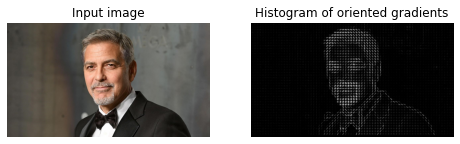

In [6]:

image= cv2.imread('clooney.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image, orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled= exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of oriented gradients')
plt.show()


In [7]:
len(fd)

25536

In [8]:
image.shape

(683, 1216, 3)

# Face Detection

In [9]:
import face_recognition

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

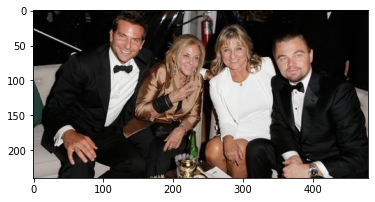

In [11]:
image=cv2.imread('group.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [12]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
number_of_faces

4

A face is located at pixel location top: 209, Left 54, bottom 245, Right90
A face is located at pixel location top: 343, Left 49, bottom 394, Right101
A face is located at pixel location top: 112, Left 26, bottom 156, Right70
A face is located at pixel location top: 269, Left 46, bottom 305, Right82


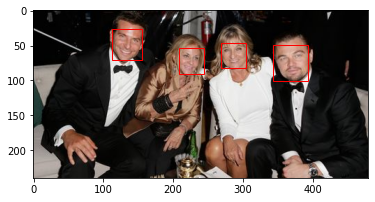

In [13]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top, right, bottom, left=face_location
  x,y,w,h=left, top, right, bottom
  print("A face is located at pixel location top: {}, Left {}, bottom {}, Right{}".format(x,y,w,h))

  rect = Rectangle((x,y), w-x,h-y, fill=False, color='red' )
  ax.add_patch(rect)

plt.show()

# **Face Recognition**


In [14]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [15]:
image=cv2.imread("sharukh.jpg")
face_demo=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("clooney.jpg")
clooney=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("leonardo.jpg")
leonardo=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [16]:
face_demo_encoding=face_recognition.face_encodings(face_demo)[0]
clooney_encoding=face_recognition.face_encodings(clooney)[0]
leonardo_encoding=face_recognition.face_encodings(leonardo)[0]

known_face_encoding=[
                     face_demo_encoding,
                     clooney_encoding,
                     leonardo_encoding
]

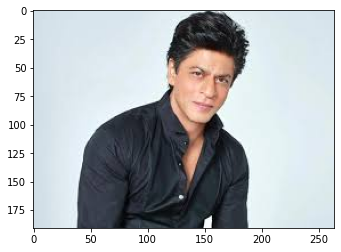

In [36]:
image= cv2.imread('sharukh_2.jpg')
unknown_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image) 

unknown_face_encoding=face_recognition.face_encodings(unknown_image)


In [40]:
from scipy.spatial import distance

results=[]
for known_face_encodings in known_face_encoding:
  d=distance.euclidean(known_face_encodings,unknown_face_encoding)
  print("Euclidean distance: ",d)
  results.append(d)
threshold=0.6
results=np.array(results) <=threshold

name="unknown"

if results[0]:
  name= "Sharukh khan is found"
elif results[1]:
  name="George Clooney"
elif results[2]:
  name="Leonardo DiCaprio"

print(f"{name} in the photo !")

Euclidean distance:  0.3645708922842288
Euclidean distance:  0.7532395050368084
Euclidean distance:  0.8976011028626059
Sharukh khan is found in the photo !


# Editing Facial Image

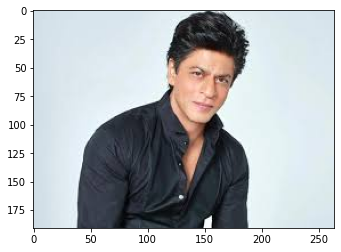

In [82]:
image=cv2.imread("sharukh_2.jpg")
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [83]:
face_landmarks_list=face_recognition.face_landmarks(image)

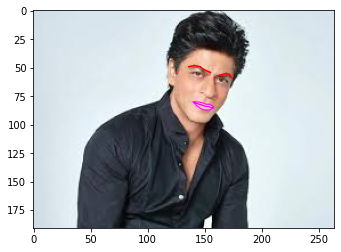

In [84]:
import matplotlib.lines as mlines
from matplotlib.patches import  Polygon

plt.imshow(image)
ax=plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts= face_landmarks['left_eyebrow']
  pre_x,pre_y=left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x], [pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y

  right_eyebrow_pts= face_landmarks['right_eyebrow']
  pre_x,pre_y=right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]: 
    l=mlines.Line2D([pre_x,x], [pre_y,y],color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y

  p=Polygon(face_landmarks['top_lip'], facecolor="pink", edgecolor="magenta")
  ax.add_patch(p)
  p=Polygon(face_landmarks['bottom_lip'], facecolor="pink", edgecolor="magenta")
  ax.add_patch(p)

plt.show()


# **Thank You!**